In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [159]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,InputLayer,Flatten,BatchNormalization,Input,Dropout,RandomFlip,RandomRotation,Resizing,Rescaling
from tensorflow.keras.layers import Layer
import tensorflow_probability as tfps
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import BinaryAccuracy,FalsePositives,FalseNegatives,TruePositives,TrueNegatives,Precision,Recall,AUC
from tensorflow.keras.callbacks import Callback,CSVLogger,EarlyStopping,LearningRateScheduler,ModelCheckpoint,ReduceLROnPlateau
from tensorflow.keras.regularizers import L2,L1
import sklearn
from sklearn.metrics import confusion_matrix,roc_curve
import seaborn as sns

from tensorflow.keras.models import Model

In [160]:
import os
import tensorflow as tf
from tensorflow import keras


In [161]:
print(tf.version.VERSION)

2.15.0


In [162]:
checkpoint_path='DLFCV.weights.h5'
checkpoint_path2='DLFCV_model.keras'

In [163]:
cp_callback=tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,save_weights_only=True,verbose=1)


In [164]:
dataset,dataset_info=tfds.load('malaria',with_info=True,as_supervised=True,shuffle_files= True,split=['train'
                                                                                                    ])
print('k')

k


In [165]:
dataset1[1:]

NameError: name 'dataset1' is not defined

In [166]:
import pandas as pd
#dataset1=pd.DataFrame(dataset)
#dataset1

In [167]:
def splits(dataset,TRAIN_RATIO,VAL_RATIO,TEST_RATIO):

  dataset_size=len(dataset)
  train_dataset=dataset.take(int(TRAIN_RATIO*dataset_size))


  val_imp_dataset=dataset.skip(int(TRAIN_RATIO*dataset_size))

  val_dataset=val_imp_dataset.take(int(VAL_RATIO*dataset_size))



  test_dataset=dataset.skip(int((TRAIN_RATIO+VAL_RATIO)*dataset_size))
  test_dataset=test_dataset.take(int(TEST_RATIO*dataset_size))


  return train_dataset,val_dataset,test_dataset

In [168]:
TRAIN_RATIO=0.6
VAL_RATIO=0.2
TEST_RATIO=0.2

#dataset=tf.data.Dataset.range(10)

train_dataset,val_dataset,test_dataset=splits(dataset[0],TRAIN_RATIO,VAL_RATIO,TEST_RATIO)

IM_SIZE=224
#def resize_rescale(image,label):
 # return tf.image.resize(image,(IM_SIZE,IM_SIZE))/255.0,label


#train_dataset=train_dataset.map(resize_rescale)
#val_dataset=val_dataset.map(resize_rescale)
#test_dataset=test_dataset.map(resize_rescale)

val_dataset=val_dataset.shuffle(buffer_size=8,reshuffle_each_iteration=True).prefetch(tf.data.AUTOTUNE)
train_dataset=train_dataset.shuffle(buffer_size=8,reshuffle_each_iteration=True).prefetch(tf.data.AUTOTUNE)

In [169]:
train_dataset


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

# Sequential API

In [173]:
dropout_rate=0.5
regularization_rate=0.01

model=tf.keras.Sequential([
    InputLayer(input_shape=(None,None,3,)),
    resize_rescale_layers,
    augment_layers,
    
    tf.keras.layers.Conv2D(
    filters=6,
    kernel_size=5,
    strides=1,
    padding='valid',
    activation='sigmoid',
    kernel_regularizer=L2(regularization_rate)

),BatchNormalization(),

    tf.keras.layers.MaxPool2D(
    pool_size=(2, 2),
    strides=2,
        

),
    Dropout(rate=dropout_rate),

    tf.keras.layers.Conv2D(
    filters=16,
    kernel_size=5,
    strides=1,
    padding='valid',
    activation='sigmoid',
    kernel_regularizer=L2(regularization_rate)

),BatchNormalization(),

    tf.keras.layers.MaxPool2D(
    pool_size=(2, 2),
    strides=2,

),Dropout(rate=dropout_rate),

    Flatten(),




    Dense(100,activation='relu',kernel_regularizer=L2(regularization_rate)),BatchNormalization(),
    Dense(10,activation='relu',kernel_regularizer=L2(regularization_rate)),BatchNormalization(),
    Dense(1,activation='sigmoid',kernel_regularizer=L2(regularization_rate)),
])

model.summary()
accuracy = tf.keras.metrics.Accuracy()
metrics = [TruePositives(name='tp'),FalsePositives(name='fp'),TrueNegatives(name='tn'),FalseNegatives(name='fn'),
         BinaryAccuracy(name='accuracy'),Precision(name='precision'),Recall(name='recall'),AUC(name='auc')]  
#'''

model.compile(optimizer=Adam(learning_rate=0.1),
              loss=BinaryCrossentropy(),
              metrics= metrics)

Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_30 (Sequential)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_31 (Sequential)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 220, 220, 6)    │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_60          │ (None, 220, 220, 6)    │            24 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 110, 110, 6)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 110, 110, 6)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 106, 106, 16)   │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_61          │ (None, 106, 106, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 53, 53, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 53, 53, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_15 (Flatten)            │ (None, 44944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 100)            │     4,494,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_62          │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_63          │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,498,921 (17.16 MB)

 Trainable params: 4,498,657 (17.16 MB)

 Non-trainable params: 264 (1.03 KB)

# Data Augementation

In [ ]:
train_data,test_data=train_test_split()

In [67]:
def visualize(original,augmented):
    plt.subplot(1,2,1)
    plt.imshow(original)
    
    plt.subplot(1,2,2)
    plt.imshow(augmented)
    
    #plt.imshow(original), plt.imshow(augmented)
    
    

In [171]:
resize_rescale_layers=tf.keras.Sequential([
    #InputLayer(input_shape=(IM_SIZE,IM_SIZE,3,)),
    Resizing(IM_SIZE,IM_SIZE),
    Rescaling(1.0/255)
])
def resize_rescale_layer(image,label):
    return resize_rescale_layers(image),label

In [172]:
augment_layers=tf.keras.Sequential([
    RandomRotation(factor=(0.25,0.2501),),
    RandomFlip(mode='horizontal')
])

def augment_layer(image,label):
    return augment_layers(resize_rescale_layers(image),training=True),label

In [103]:
original_image,label=next(iter(train_dataset))

In [107]:
val_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [71]:
resize_rescale_layers.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resizing_4 (Resizing)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_4 (Rescaling)         │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [178]:
#resize_rescale_layer1=resize_rescale_layers.compile()
#test_dataset=test_dataset.map(resize_rescale_layer)

In [149]:
Batch_SIZE= 1
train_dataset=(
        mixed_dataset
        .shuffle(buffer_size=8,reshuffle_each_iteration=True)
        .map(mixup)
        .batch(Batch_SIZE)
        .prefetch(tf.data.AUTOTUNE))

In [150]:
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None))>

In [146]:
Batch_SIZE= 1
val_dataset=(
        val_dataset
        .shuffle(buffer_size=8,reshuffle_each_iteration=True)
        .map(resize_rescale)
        .batch(Batch_SIZE)
        .prefetch(tf.data.AUTOTUNE))

In [147]:
val_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [ ]:
def resize_rescale(image,label):
    return tf.image.resize(image,(IM_SIZE,IM_SIZE))/255.0,label

/tmp/ipykernel_1245/1553977380.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,2)


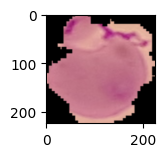

In [78]:
visualize(original_image,augmented_image)

In [18]:
IM_SIZE,IM_SIZE,3,

(224, 224, 3)

In [148]:
history=model.fit(train_dataset,validation_data=val_dataset,epochs=5,verbose=1)



Epoch 1/5


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None, 224, 224, 3), output.shape=(None, 1)

# MIxed data augmentation


In [174]:
train_dataset1=train_dataset.shuffle(buffer_size=8,reshuffle_each_iteration=True).map(resize_rescale)
train_dataset2=train_dataset.shuffle(buffer_size=8,reshuffle_each_iteration=True).map(resize_rescale)

mixed_dataset=tf.data.Dataset.zip((train_dataset1,train_dataset2))

In [175]:
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [176]:
def mixup(train_dataset1,train_dataset2):
    (image1,label1),(image2,label2)=train_dataset1,train_dataset2
    
    lamda=tfps.distributions.Beta(0.4,0.4)
    lamda=lamda.sample(1)[0]
    
    image=lamda*image1+(1-lamda)*image2
    label=lamda*image1+(1-lamda)*image2
    
    return image,label

# Visualizing Confusion Matrix

In [49]:
labels=[]
inp=[]



for x,y in test_dataset.as_numpy_iterator():
    labels.append(y)
    inp.append(x)
    


In [52]:
inp=np.array(inp)
print(inp.shape)

(5511, 224, 224, 3)


In [46]:
labels=np.array(labels)


In [56]:
predicted=model.predict(inp)
print(predicted.shape)
print(predicted[:,0].shape)

173/173 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step
(5511, 1)
(5511,)


[[2724   31]
 [1669 1087]]


Text(0.5, 58.7222222222222, 'predicted')

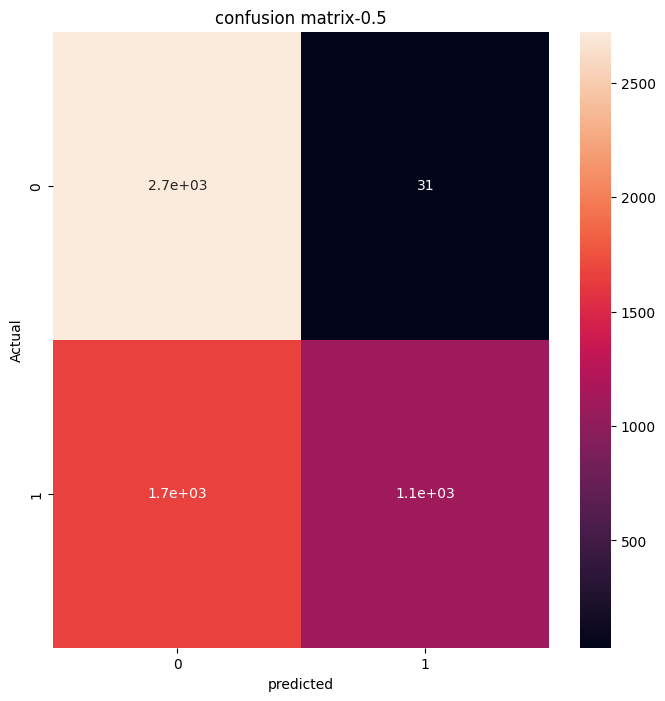

In [63]:
threshold=0.5

cm=confusion_matrix(labels,predicted>threshold)
print(cm)

plt.figure(figsize=(8,8))
sns.heatmap(cm,annot=True)
plt.title('confusion matrix-{}'.format(threshold))
plt.ylabel('Actual')
plt.xlabel('predicted')

# ROC Plots

979 979 979


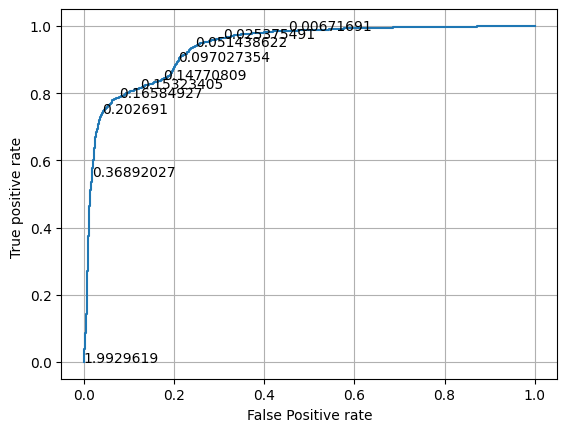

In [72]:
fp,tp,thresholds=roc_curve(labels,predicted)
print(len(fp),len(tp),len(thresholds))
plt.plot(fp,tp)
plt.xlabel('False Positive rate')
plt.ylabel('True positive rate ')

skip=100
for i in range(0,len(thresholds),skip):
    plt.text(fp[i],tp[i],thresholds[i])

plt.grid()
plt.show()

In [22]:
model.save(checkpoint_path2)

# Functional API

In [35]:


func_input=Input(shape=(IM_SIZE,IM_SIZE,3),name='image')

x=tf.keras.layers.Conv2D(
    filters=6,
    kernel_size=3,
    strides=1,
    padding='valid',
    activation='relu')(func_input)
x=BatchNormalization()(x)
x=tf.keras.layers.MaxPool2D(
    pool_size=2,
    strides=2)(x)
x=tf.keras.layers.Conv2D(
    filters=16,
    kernel_size=3,
    strides=1,
    padding='valid',
    activation='relu')(x)

x=BatchNormalization()(x)

output=tf.keras.layers.MaxPool2D(
    pool_size=2,
    strides=2)(x)






func_output=Dense(1,activation='sigmoid')(x)

feature_extractor=Model(func_input,output,name='Feature_extractor')
feature_extractor.summary()


Model: "Feature_extractor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ image (InputLayer)              │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 222, 222, 6)    │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 222, 222, 6)    │            24 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 111, 111, 6)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 109, 109, 16)   │           880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 109, 109, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 54, 54, 16)     │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,136 (4.44 KB)

 Trainable params: 1,092 (4.27 KB)

 Non-trainable params: 44 (176.00 B)

In [3]:
func_filepath1='func_DLCV.keras'
func_filepath2='func_DLCV.weights.h5'

In [70]:
func_input=Input(shape=(IM_SIZE,IM_SIZE,3),name='image')

x=feature_sub_classed(func_input)

x=Flatten()(x)



x=Dense(100,activation='relu')(x)
x=BatchNormalization()(x)
x=Dense(10,activation='relu')(x)
x=BatchNormalization()(x)
func_output=Dense(1,activation='sigmoid')(x)

model_func=Model(func_input,func_output,name='sequential')
model_func


<Functional name=sequential, built=True>

In [36]:
func_input=Input(shape=(IM_SIZE,IM_SIZE,3),name='image')

x=feature_extractor(func_input)

x=Flatten()(x)



x=Dense(100,activation='relu')(x)
x=BatchNormalization()(x)
x=Dense(10,activation='relu')(x)
x=BatchNormalization()(x)
func_output=Dense(1,activation='sigmoid')(x)

model_func=Model(func_input,func_output,name='sequential')
model_func.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ image (InputLayer)              │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Feature_extractor (Functional)  │ (None, 54, 54, 16)     │         1,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 46656)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 100)            │     4,665,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,668,297 (17.81 MB)

 Trainable params: 4,668,033 (17.81 MB)

 Non-trainable params: 264 (1.03 KB)

In [34]:
history_func=model_func.fit(train_dataset,validation_data=val_dataset,epochs=100,verbose=1,callbacks=[func_callback])

Epoch 1/100
517/517 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.1169 - loss: 0.4420
Epoch 1: saving model to func_DLCV.weights.h5
517/517 ━━━━━━━━━━━━━━━━━━━━ 29s 44ms/step - accuracy: 0.1168 - loss: 0.4418 - val_accuracy: 0.0000e+00 - val_loss: 0.2499
Epoch 2/100
516/517 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.0000e+00 - loss: 0.2070
Epoch 2: saving model to func_DLCV.weights.h5
517/517 ━━━━━━━━━━━━━━━━━━━━ 17s 33ms/step - accuracy: 0.0000e+00 - loss: 0.2070 - val_accuracy: 0.0000e+00 - val_loss: 0.1845
Epoch 3/100
515/517 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.0000e+00 - loss: 0.1810
Epoch 3: saving model to func_DLCV.weights.h5
517/517 ━━━━━━━━━━━━━━━━━━━━ 18s 34ms/step - accuracy: 0.0000e+00 - loss: 0.1810 - val_accuracy: 0.0000e+00 - val_loss: 0.2073
Epoch 4/100
516/517 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.0000e+00 - loss: 0.1670
Epoch 4: saving model to func_DLCV.weights.h5
517/517 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - accuracy: 0.0000e+00 - loss: 0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


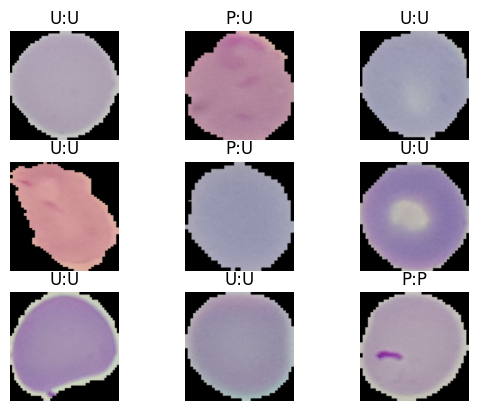

In [22]:
for i ,(image,label) in enumerate(test_dataset.take(9)):

  ax=plt.subplot(3,3,i+1)
  plt.imshow(image[0])
  plt.title(str(parasite_or_not(label.numpy()[0]))+':'+str(parasite_or_not(model.predict(image)[0][0])))
  plt.axis('off')

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend('trainloss','val_loss')
plt.show


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend('trainaccuray','val_accuracy')
plt.show


test_dataset=test_dataset.batch(1)
#parasite_or_not(model.predict(test_dataset.take(1)))

def parasite_or_not(x):
  if(x<0.5):
    return str('P')
  else:
    return str('U')

for i ,(image,label) in enumerate(test_dataset.take(9)):

  ax=plt.subplot(3,3,i+1)
  plt.imshow(image[0])
  plt.title(str(parasite_or_not(label.numpy()[0]))+':'+str(parasite_or_not(model.predict(image)[0][0])))
  plt.axis('off')

NameError: name 'history' is not defined

/tmp/ipykernel_34/4045059479.py:6: UserWarning: The label '_' of 'i' starts with '_'. It is thus excluded from the legend.
  plt.legend('trainaccuray','val_accuracy')
/tmp/ipykernel_34/4045059479.py:6: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend('trainaccuray','val_accuracy')


<function matplotlib.pyplot.show(close=None, block=None)>

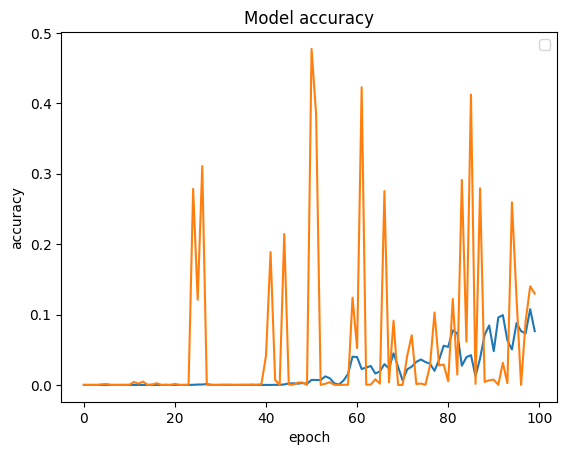

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend('trainaccuray','val_accuracy')
plt.show

/tmp/ipykernel_34/3351306411.py:6: UserWarning: The label '_' of 'i' starts with '_'. It is thus excluded from the legend.
  plt.legend('trainloss','val_loss')
/tmp/ipykernel_34/3351306411.py:6: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend('trainloss','val_loss')


<function matplotlib.pyplot.show(close=None, block=None)>

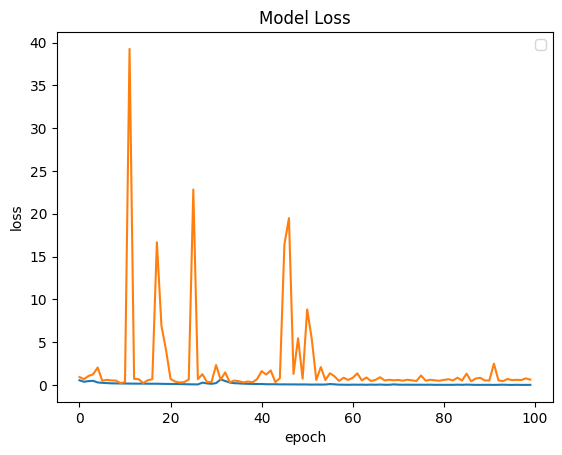

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend('trainloss','val_loss')
plt.show




In [21]:
func_callback=tf.keras.callbacks.ModelCheckpoint(filepath=func_filepath2,save_weights_only=True,verbose=1)

# Model Subclassing

In [17]:
model_sub_filepath='modelsubclassing.keras'
model_sub_weights_filepath='modelsubclassing.weights.h5'

In [18]:
class FeatureExtractor(Layer):
    def __init__(self,filters,kernel_size,strides,padding,activation,pool_size):
        super(FeatureExtractor,self).__init__()
        
        self.conv_1=Conv2D(
    filters=  filters,
    kernel_size=kernel_size,
    strides=strides,
    padding=padding,
    activation=activation)
        
        self.batch_1=BatchNormalization()
        self.pool_1=MaxPool2D(
    pool_size,
    strides=2*strides)
        
        self.conv_2=Conv2D(
     filters=  filters*2,
    kernel_size=kernel_size,
    strides=strides,
    padding=padding,
    activation=activation)
        
        
        self.batch_2=BatchNormalization()
        self.pool_2=MaxPool2D(
    pool_size,
    strides=2*strides)
        
        
    def call(self,x):
        x=self.conv_1(x)
        x=self.batch_1(x)
        x=self.pool_1(x)
        
        x=self.conv_2(x)
        x=self.batch_2(x)
        x=self.pool_2(x)
        
        return x
        
feature_sub_classed=FeatureExtractor(8,3,1,'valid','relu',2)

In [19]:
feature_sub_classed(Input(shape=(IM_SIZE,IM_SIZE,3),name='image'))

<KerasTensor shape=(None, 54, 54, 16), dtype=float32, sparse=False, name=keras_tensor_1>

In [20]:
(IM_SIZE,IM_SIZE,3)

(224, 224, 3)

In [22]:
class LenetModel(Model):
    
    

    def __init__(self):
        super(LenetModel,self).__init__()
        
        self.feature_extractor=FeatureExtractor(8,3,1,'valid','relu',2)
        self.flatten=Flatten()
        
        
        
        self.dense_1=Dense(100,activation='relu')
        self.batch_1=BatchNormalization()
        self.dense_2=Dense(10,activation='relu')
        self.batch_2=BatchNormalization()
        
        self.dense_3=Dense(1,activation='sigmoid')
       

    def call(self,x):
        
        
        x=self.feature_extractor(x)
        x=self.flatten(x)
        
        x=self.dense_1(x)
        x=self.batch_1(x)
        x=self.dense_2(x)
        x=self.batch_2(x)
        x=self.dense_3(x)

        
        return x
    
lenet_sub_classed2=LenetModel()   
lenet_sub_classed2(Input(shape=(224,224,3),name='image'))
lenet_sub_classed2.summary()


'''Model23_input=Input(shape=(224,224,3),name='image')
Model23_output=lenet_sub_classed(Model23_input)

lenet_sub_classed_model=Model(Model23_input,Model23_output,name='tchoumani')

lenet_sub_classed_model.summary()

lenet_sub_classed(Input(shape=(224,224,3),name='image'))
lenet_sub_classed
#LenetModel()'''



Model: "lenet_model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ feature_extractor_2             │ ?                      │         1,488 │
│ (FeatureExtractor)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │     4,665,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ ?                      │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ ?                      │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,668,649 (17.81 MB)

 Trainable params: 4,668,381 (17.81 MB)

 Non-trainable params: 268 (1.05 KB)

"Model23_input=Input(shape=(224,224,3),name='image')\nModel23_output=lenet_sub_classed(Model23_input)\n\nlenet_sub_classed_model=Model(Model23_input,Model23_output,name='tchoumani')\n\nlenet_sub_classed_model.summary()\n\nlenet_sub_classed(Input(shape=(224,224,3),name='image'))\nlenet_sub_classed\n#LenetModel()"

In [26]:
lenet_sub_classed2.compile(optimizer=Adam(learning_rate=0.01),
                  loss=BinaryCrossentropy(),
                  metrics=[Accuracy])


In [27]:
history_lenet_sub_classs=lenet_sub_classed2.fit(train_dataset,validation_data=val_dataset,epochs=5,verbose=1)

Epoch 1/5
  7/517 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.1067 - loss: 5.0696    

I0000 00:00:1717323825.136699     103 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1717323825.154926     103 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


517/517 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0053 - loss: 0.9479

W0000 00:00:1717323843.258494     103 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


517/517 ━━━━━━━━━━━━━━━━━━━━ 30s 42ms/step - accuracy: 0.0053 - loss: 0.9474 - val_accuracy: 0.0000e+00 - val_loss: 0.6932
Epoch 2/5
517/517 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - accuracy: 0.0000e+00 - loss: 0.6938 - val_accuracy: 0.0000e+00 - val_loss: 0.6931
Epoch 3/5
517/517 ━━━━━━━━━━━━━━━━━━━━ 18s 34ms/step - accuracy: 0.0000e+00 - loss: 0.6938 - val_accuracy: 0.0000e+00 - val_loss: 0.6932
Epoch 4/5
517/517 ━━━━━━━━━━━━━━━━━━━━ 18s 34ms/step - accuracy: 0.0000e+00 - loss: 0.6938 - val_accuracy: 0.0000e+00 - val_loss: 0.6932
Epoch 5/5
517/517 ━━━━━━━━━━━━━━━━━━━━ 18s 35ms/step - accuracy: 0.0000e+00 - loss: 0.6937 - val_accuracy: 0.0000e+00 - val_loss: 0.6932


In [57]:
Input(shape=(IM_SIZE,IM_SIZE,3),name='image')

<KerasTensor shape=(None, 224, 224, 3), dtype=float32, sparse=None, name=image>

In [32]:
model_func.save(func_filepath1)

In [33]:
model_func.compile(optimizer=Adam(learning_rate=0.01),
                  loss=BinaryCrossentropy(),
                  metrics=[accuracy])


In [ ]:
# Mod

# Custom Layers



In [30]:
class NeuralearnDense(Layer):
    def __init__(self,output_units,activation):
        super(NeuralearnDense,self).__init__()
        self.output_units=output_units
        self.activation=activation
        
    def build(self,input_features_shape):
        self.weighs=self.add_weight(shape=(input_features_shape[-1],self.output_units),initializer='random_normal',trainable=1)
        self.bpases=self.add_weight(shape=(self.output_units,),initializer='random_normal',trainable=True)
        
    def call(self,input_feature):
        if (self.activation=='relu'):
            return tf.nn.relu(tf.matmul(input_feature,self.weighs)+self.bpases)
        elif(self.activation=='sigmoid'):
            return tf.math.sigmoid(tf.matmul(input_feature,self.weighs)+self.bpases)
        else:
            return tf.matmul(input_feature,self.weighs)+self.bpases

In [31]:
IM_SIZE=224
model=tf.keras.Sequential([
    InputLayer(input_shape=(IM_SIZE,IM_SIZE,3,)),
    
    tf.keras.layers.Conv2D(
    filters=6,
    kernel_size=5,
    strides=1,
    padding='valid',
    activation='sigmoid'

),BatchNormalization(),

    tf.keras.layers.MaxPool2D(
    pool_size=(2, 2),
    strides=2,

),

    tf.keras.layers.Conv2D(
    filters=16,
    kernel_size=5,
    strides=1,
    padding='valid',
    activation='sigmoid'

),BatchNormalization(),

    tf.keras.layers.MaxPool2D(
    pool_size=(2, 2),
    strides=2,

),

    Flatten(),




    NeuralearnDense(100,activation='relu'),BatchNormalization(),
    NeuralearnDense(10,activation='relu'),BatchNormalization(),
    NeuralearnDense(1,activation='sigmoid'),
])

model.summary()
accuracy = tf.keras.metrics.Accuracy()
metrics = [accuracy]  


model.compile(optimizer=Adam(learning_rate=0.01),
              loss=BinaryCrossentropy(),
              metrics= metrics
                )

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)              │ (None, 220, 220, 6)    │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_44          │ (None, 220, 220, 6)    │            24 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 110, 110, 6)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 106, 106, 16)   │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_45          │ (None, 106, 106, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 53, 53, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 44944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ neuralearn_dense_33             │ (None, 100)            │     4,494,500 │
│ (NeuralearnDense)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_46          │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ neuralearn_dense_34             │ (None, 10)             │         1,010 │
│ (NeuralearnDense)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_47          │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ neuralearn_dense_35             │ (None, 1)              │            11 │
│ (NeuralearnDense)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,498,921 (17.16 MB)

 Trainable params: 4,498,657 (17.16 MB)

 Non-trainable params: 264 (1.03 KB)

# Callbacks


In [30]:
class LossCallback(Callback):
    def on_epoch_end(self,epoch,logs):
        print('epoch Number {} the model has a loss {}'.format(epoch+1,logs['loss']))
        
    def on_batch(self,batch,logs):
        print('\nfor batch num {} the model has a loss of {}'.format(batch+1,logs))

In [31]:
csv_callback=CSVLogger(
'filelog', separator=',',append=False
)

# Learning Rate Scheduler

In [32]:
def schedular(epoch,lr):
    if epoch<=3:
        
        return lr
    else:
        return lr*tf.math.exp(-0.1)

In [33]:
schedular_callback=LearningRateScheduler(schedular,verbose=1)

In [34]:
es=EarlyStopping(
monitor='val_loss',min_delta=0,patience=2,verbose=1,mode='auto',baseline=None,restore_best_weights=True
)

# Checkpoint Callback

In [35]:
checkpoint_callback=ModelCheckpoint(
'model.weights.h5',monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=True,mode='auto',save_freq=2
)

# Reduce Learning Rate on Plateau

In [36]:
plateau_callback=ReduceLROnPlateau(
monitor='val_accuracy',factor=0.1,patience=2,verbose=1
)

In [37]:
history=model.fit(train_dataset,validation_data=val_dataset,epochs=8,verbose=1,batch_size=100,callbacks=[LossCallback(),csv_callback,checkpoint_callback,plateau_callback])

Epoch 1/8
  2/517 ━━━━━━━━━━━━━━━━━━━━ 8:21 974ms/step - accuracy: 0.4844 - auc: 0.5160 - fn: 11.0000 - fp: 13.0000 - loss: 0.8256 - precision: 0.4601 - recall: 0.5156 - tn: 12.0000 - tp: 12.0000

/opt/conda/lib/python3.10/site-packages/keras/src/callbacks/model_checkpoint.py:199: UserWarning: Can save best model only with val_loss available, skipping.
  self._save_model(epoch=self._current_epoch, batch=batch, logs=logs)


108/517 ━━━━━━━━━━━━━━━━━━━━ 6:23 938ms/step - accuracy: 0.5471 - auc: 0.5637 - fn: 391.0000 - fp: 378.0648 - loss: 0.7138 - precision: 0.5629 - recall: 0.5525 - tn: 464.4630 - tp: 510.4722

KeyboardInterrupt: 

In [42]:
malaria_model_json=model.to_json()
with open('malaria_model.json','w') as json_file:
    json_file.write(malaria_model_json)
    
model.save_weights('malaria_model.weights.h5')

NameError: name 'model' is not defined

In [43]:
print('p')

p
